## Notebook d'exploration - Projet 5 - David Depouez

### 1. Importation et selection

Importation des modules et lecture du fichier de données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Requette SQL pour obtenir les datas depuis stack overflow (https://data.stackexchange.com/stackoverflow/query/new).
Le résultats est stocké dans un fichier QueryResults.csv

SELECT TOP 500000 Title, Body, Tags, Id, Score, ViewCount, FavoriteCount, AnswerCount FROM Posts WHERE AnswerCount > 0 AND LEN(Tags) - LEN(REPLACE(Tags, '<','')) >= 5

In [2]:
Version = 3

filename = "QueryResults.csv"
outputFilename = 'Cleaned-V' + str(Version) + ".csv"

print("Output DataFrame filename will be :",outputFilename)

Output DataFrame filename will be : Cleaned-V3.csv


In [3]:
path = "./data/source/"

df = pd.read_csv(path+filename)

In [4]:
df.head()

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
0,After setting up IIS Express to recognize JSON...,<p>I've setup IIS Express to handle a .json fi...,<javascript><json><iis><express><visual-studio...,19817529,0,232,NaN,2
1,Laravel 4 and Angular JS and Twitter Bootstrap...,<p><strong><em>Edit:</em></strong></p>\n\n<p>I...,<javascript><angularjs><laravel><laravel-4><tw...,19817540,2,7506,0.0,2
2,Adding an image to SQL database using Visual C#,<p>I am working on a visual C# program for ima...,<c#><asp.net><sql><sql-server><winforms>,19817552,5,31344,0.0,4
3,Accessing OpenCL GPU from windows 7 through ssh,<p>I have computers where I want to run OpenCL...,<windows><ssh><opencl><remote-access><openssh>,19817559,0,355,NaN,1
4,Slim Eloquent Relation does not work properly,<p>I am making some crud operations with Slim3...,<php><eloquent><orm><slim><relation>,57479977,0,150,0.0,1


In [5]:
df.tail()

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
49995,Update State in React (Firebase) Undefined Value,<p>I'm creating a login page using Firebase. A...,<authentication><reactjs><firebase><redux><set...,41293165,1,664,0.0,1
49996,How to integrate maven the right way into Ecli...,<p>I am new to maven. The main feature I benef...,<eclipse><version-control><maven-2><m2eclipse>...,3603977,1,1386,0.0,2
49997,The old IN vs. Exists vs. Left Join (Where ___...,<p>I have found my self in quite a pickle. I h...,<sql><sql-server><tsql><join><exists>,3604042,2,3209,0.0,2
49998,Programmatically calling drag event from funct...,<p>I have following code in Javascript file.\n...,<javascript><jquery><jquery-ui><jquery-events>...,22294955,0,1606,NaN,2
49999,why cookies are always disabled in IE 10,<p>i am using</p>\n\n<pre><code> navigator.coo...,<javascript><jquery><internet-explorer><cookie...,22294960,0,202,NaN,1


In [6]:
df.sample(10)

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
20463,Updating a clockpicker input field using XML,"<p><div class=""snippet"" data-lang=""js"" data-hi...",<javascript><jquery><html><xml><error-handling>,43458277,1,63,NaN,2
39931,LibGDX - Cannot get texture from FrameBuffer,"<p>I try to implement some post-processing, so...",<java><android><opengl-es-2.0><libgdx><framebu...,21978314,2,2053,NaN,1
32367,Choose build configuration for referenced subp...,<p>I have an iPhone project which references a...,<iphone><objective-c><cocoa><cocoa-touch><xcode>,3044675,1,212,0.0,1
48657,Attribute based vs. activity based access control,<p>What's the difference between <strong>attri...,<authorization><cloud><soa><xacml><abac>,22284869,4,1159,NaN,1
24810,feature selection for regression vs classifica...,<p>New to Machine learning so please bear with...,<python-3.x><machine-learning><classification>...,49031431,1,821,0.0,1
38562,Django Model not saving to MySQL (Maria DB) wh...,<p>My app (Django v 2.2.5) is using MySQL (Mar...,<python><mysql><django><mariadb><mariadb-10.4>,59305900,0,304,NaN,2
22202,Floating point accuracy and order of operations,<p>I'm writing a unit test for a class for 3D ...,<floating-point><language-agnostic><precision>...,63631639,0,620,NaN,2
23065,I want to create bootstrap image container and...,<p>I want to create bootstrap modal and image ...,<asp.net><.net><twitter-bootstrap><c#-4.0><boo...,46644890,3,1376,0.0,2
38037,"Ruby on Rails: Polymorphic Association, associ...","<p>I'm working on polymorphic association, but...",<ruby-on-rails><ruby><ruby-on-rails-3><associa...,21964782,0,155,NaN,1
16232,Gzip compression and decompression without any...,<p>I want to decompress a string in java which...,<java><python><base64><gzip><compression>,39037445,2,1733,NaN,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          50000 non-null  object 
 1   Body           50000 non-null  object 
 2   Tags           50000 non-null  object 
 3   Id             50000 non-null  int64  
 4   Score          50000 non-null  int64  
 5   ViewCount      50000 non-null  int64  
 6   FavoriteCount  15890 non-null  float64
 7   AnswerCount    50000 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 3.1+ MB


On enlève les colonnes non pertinentes

In [8]:
def getCompCols(df,cols):
    ### Get complements colons of cols for a dataframe df ###
    ComplementCols =  [name for i,name in enumerate(df.columns) if name not in cols]
    return ComplementCols

In [9]:
colsToKeep = ['Title','Body','Tags']
colsToThrow = getCompCols(df,colsToKeep)
df.drop(colsToThrow,axis=1,inplace=True)

In [10]:
print(df.shape)
df.head()

(50000, 3)


,Title,Body,Tags
0,After setting up IIS Express to recognize JSON...,<p>I've setup IIS Express to handle a .json fi...,<javascript><json><iis><express><visual-studio...
1,Laravel 4 and Angular JS and Twitter Bootstrap...,<p><strong><em>Edit:</em></strong></p>\n\n<p>I...,<javascript><angularjs><laravel><laravel-4><tw...
2,Adding an image to SQL database using Visual C#,<p>I am working on a visual C# program for ima...,<c#><asp.net><sql><sql-server><winforms>
3,Accessing OpenCL GPU from windows 7 through ssh,<p>I have computers where I want to run OpenCL...,<windows><ssh><opencl><remote-access><openssh>
4,Slim Eloquent Relation does not work properly,<p>I am making some crud operations with Slim3...,<php><eloquent><orm><slim><relation>


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   50000 non-null  object
 1   Body    50000 non-null  object
 2   Tags    50000 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


In [12]:
df.nunique()

Title    49998
Body     49999
Tags     48541
dtype: int64

In [13]:
df.isna().sum()

Title    0
Body     0
Tags     0
dtype: int64

In [14]:
df.duplicated().value_counts()

False    50000
dtype: int64

### 2. Nettoyage du DataFrame

Import de la librairie NLTK

In [15]:
import nltk
#nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vad\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Diverses fonctions de nettoyage du texte

In [16]:
# Tokenizer
def tokenizer_fct(sentence) :
    # print(sentence)
    #sentence_clean = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ')
    sentence_clean = sentence.replace('-', ' ').replace('&', ' ').replace('/', ' ')
    word_tokens = word_tokenize(sentence_clean)
   
    return word_tokens

def retokenizer_fct(tokens) :
    mwtokenizer = nltk.MWETokenizer(separator='')
    mwtokenizer.add_mwe(('c', '#'))
    word_tokens = mwtokenizer.tokenize(tokens)
    
    return word_tokens

# Stop words
from nltk.corpus import stopwords
stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')',';','!','<','>']

def stop_word_filter_fct(list_words) :
    filtered_w = [w for w in list_words if not w in stop_w]
    return filtered_w

# lower case et alpha
def lower_start_fct(list_words) :
    lw = [w.lower() for w in list_words if (not w.startswith("@")) 
    #                                   and (not w.startswith("#"))
                                       and (not w.startswith("http"))]
    return lw

# Lemmatizer (base d'un mot)
from nltk.stem import WordNetLemmatizer

def lemma_fct(list_words) :
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

# remove code and tags in pattern : <code> code </code>)
def removeCodeMarkup(sentence):
    codeMarkupRegEx = r'<code>(.*?)</code>'
    #re.compile(codeMarkupRegEx,flag=re.DOTALL)
    cleanText = re.sub(codeMarkupRegEx,'',sentence,flags=re.DOTALL)
    return cleanText

# remove html tags
def removeHTML(sentence):
    htmlMarkupRegEx = '<.*?>'
    cleanText = re.sub(htmlMarkupRegEx,'',sentence)
    return cleanText

# Fonction de préparation du texte pour le bag of words avec lemmatization
def transform_bow_lem_fct(desc_text) :
    sentence = removeCodeMarkup(desc_text)
    sentence = removeHTML(sentence)
    word_tokens = tokenizer_fct(sentence)
    lw = lower_start_fct(word_tokens)
    sw = stop_word_filter_fct(lw)
    re_sw = retokenizer_fct(sw)
    lem_w = lemma_fct(re_sw)    
    transf_desc_text = ' '.join(lem_w)
    return transf_desc_text

# Fonction de préparation du texte pour le Deep learning (USE et BERT)
def transform_dl_fct(desc_text) :
    sentence = removeCodeMarkup(desc_text)
    sentence = removeHTML(sentence)
    word_tokens = tokenizer_fct(sentence)
#    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(word_tokens)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text


#### Nettoyage avec lemmatisation (pour Sac de mots et Word2Vect)

In [17]:
df['Title_clean_lem'] = df['Title'].apply(lambda x : transform_bow_lem_fct(x))
df['Body_clean_lem'] = df['Body'].apply(lambda x : transform_bow_lem_fct(x))

#### Nettoyage sans lemmatisation (pour BERT et USE)

In [18]:
df['Title_clean'] = df['Title'].apply(lambda x : transform_dl_fct(x))
df['Body_clean'] = df['Body'].apply(lambda x : transform_dl_fct(x))

#### Récuperation du premier tag fourni

In [19]:
def extractFirstTag(rawTags):
    tags = rawTags.replace('>',' ').replace('<',' ')
    tagsList = tags.split()
    tag = tagsList[0]
    return tag

Nouvelle colonne avec le tag principal (cela sera notre label pour les modèles avec apprentissage supervisé)

In [20]:
df['First_tag'] = df['Tags'].apply(lambda x : extractFirstTag(x))

#### Valeurs manquantes

In [21]:
df.isna().sum()

Title              0
Body               0
Tags               0
Title_clean_lem    0
Body_clean_lem     0
Title_clean        0
Body_clean         0
First_tag          0
dtype: int64

In [22]:
mask = df['Body_clean'].isna() | df['Body_clean_lem'].isna() | df['First_tag'].isna()
mask.value_counts()
#df.loc[mask == True,:]

False    50000
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            50000 non-null  object
 1   Body             50000 non-null  object
 2   Tags             50000 non-null  object
 3   Title_clean_lem  50000 non-null  object
 4   Body_clean_lem   50000 non-null  object
 5   Title_clean      50000 non-null  object
 6   Body_clean       50000 non-null  object
 7   First_tag        50000 non-null  object
dtypes: object(8)
memory usage: 3.1+ MB


On affiche les vingt tags les plus fréquents

In [24]:
df['First_tag'].value_counts().iloc[:20]

javascript       6726
java             5941
c#               5503
python           4340
php              3035
c++              2336
ios              2106
android          1790
sql               928
c                 868
html              768
ruby-on-rails     694
jquery            623
.net              600
node.js           566
iphone            562
mysql             513
asp.net           482
linux             469
r                 442
Name: First_tag, dtype: int64

In [25]:
dfFull = df.copy()

On supprime les colonnes non traitées

In [26]:
colsToThrow = ['Title','Body','Tags']
df.drop(colsToThrow,axis=1,inplace=True)

In [27]:
df.shape

(50000, 5)

On concatène les titres et corps de texte

In [28]:
df['Text'] = df['Title_clean'] + ' ' + df['Body_clean']
df['Text_lem'] = df['Title_clean_lem'] + ' ' + df['Body_clean_lem']

In [29]:
df.shape

(50000, 7)

On supprime les colonnes intermediaires

In [30]:
colsToThrow = ['Title_clean','Body_clean','Title_clean_lem','Body_clean_lem']
df.drop(colsToThrow,axis=1,inplace=True)

In [31]:
df.head()

,First_tag,Text,Text_lem
0,javascript,after setting up iis express to recognize json...,setting ii express recognize json file type v ...
1,javascript,laravel 4 and angular js and twitter bootstrap...,laravel 4 angular j twitter bootstrap 3 pagina...
2,c#,adding an image to sql database using visual c...,adding image sql database using visual c# work...
3,windows,accessing opencl gpu from windows 7 through ss...,accessing opencl gpu window 7 ssh computer wan...
4,php,slim eloquent relation does not work properly ...,slim eloquent relation work properly making cr...


#### On selectionne les entrées dès dix tags les plus fréquents

In [32]:
restrictTagList = df['First_tag'].value_counts().iloc[:10].index.tolist()
restrictTagList

['javascript',
 'java',
 'c#',
 'python',
 'php',
 'c++',
 'ios',
 'android',
 'sql',
 'c']

In [33]:
mask = []
for i in range(len(df)):
    str = df.loc[i,'First_tag']
    if str in restrictTagList :
        mask.append(True)
    else:
        mask.append(False)
        
mask = pd.Series(mask)
dfReduct = df.loc[mask == True,:]
print(dfReduct.shape)

(33573, 3)


on réinitialise les index

In [34]:
dfReduct.reset_index(drop=True,inplace=True)

In [35]:
dfReduct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33573 entries, 0 to 33572
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   First_tag  33573 non-null  object
 1   Text       33573 non-null  object
 2   Text_lem   33573 non-null  object
dtypes: object(3)
memory usage: 787.0+ KB


In [36]:
dfReduct.head()

,First_tag,Text,Text_lem
0,javascript,after setting up iis express to recognize json...,setting ii express recognize json file type v ...
1,javascript,laravel 4 and angular js and twitter bootstrap...,laravel 4 angular j twitter bootstrap 3 pagina...
2,c#,adding an image to sql database using visual c...,adding image sql database using visual c# work...
3,php,slim eloquent relation does not work properly ...,slim eloquent relation work properly making cr...
4,python,how to convert json data into specified pandas...,convert json data specified panda dataframe js...


On crée des colonnes avec le nombre de mots

In [37]:
dfReduct['Text_lem_length'] = dfReduct['Text_lem'].apply(lambda x : len(word_tokenize(x)))
dfReduct['Text_length'] = dfReduct['Text'].apply(lambda x : len(word_tokenize(x)))

C:\Users\vad\AppData\Local\Temp\ipykernel_3100\4089890398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfReduct['Text_lem_length'] = dfReduct['Text_lem'].apply(lambda x : len(word_tokenize(x)))
C:\Users\vad\AppData\Local\Temp\ipykernel_3100\4089890398.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfReduct['Text_length'] = dfReduct['Text'].apply(lambda x : len(word_tokenize(x)))


In [38]:
dfReduct.head()

,First_tag,Text,Text_lem,Text_lem_length,Text_length
0,javascript,after setting up iis express to recognize json...,setting ii express recognize json file type v ...,64,117
1,javascript,laravel 4 and angular js and twitter bootstrap...,laravel 4 angular j twitter bootstrap 3 pagina...,92,207
2,c#,adding an image to sql database using visual c...,adding image sql database using visual c# work...,76,138
3,php,slim eloquent relation does not work properly ...,slim eloquent relation work properly making cr...,58,113
4,python,how to convert json data into specified pandas...,convert json data specified panda dataframe js...,41,84


Affichage d'un nuage de mots

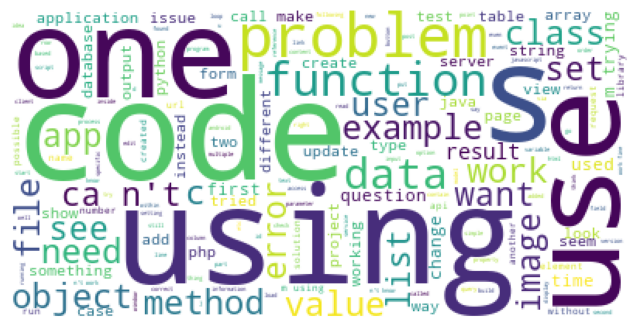

In [39]:
# Import the wordcloud library
from wordcloud import WordCloud# Join the different processed titles together.
long_string = ','.join(list(dfReduct['Text_lem'].values))# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')# Generate a word cloud
wordcloud.generate(long_string)# Visualize the word cloud
#wordcloud.to_image()
plt.figure( figsize=(8,8) )
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### 3. Ecriture du dataframe final mis en forme

In [40]:
path = "./data/cleaned/"

dfReduct.to_csv(path+outputFilename,index=False)